In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [3]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            29020 non-null  int64  
 1   Booking_ID                            29020 non-null  object 
 2   no_of_adults                          29020 non-null  int64  
 3   no_of_children                        29020 non-null  int64  
 4   no_of_weekend_nights                  29020 non-null  int64  
 5   no_of_week_nights                     29020 non-null  int64  
 6   type_of_meal_plan                     29020 non-null  object 
 7   required_car_parking_space            29020 non-null  int64  
 8   room_type_reserved                    29020 non-null  object 
 9   lead_time                             29020 non-null  int64  
 10  arrival_year                          29020 non-null  int64  
 11  arrival_month  

In [5]:
df.shape

(29020, 20)

In [6]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [7]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [8]:
df.shape

(29020, 18)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21359, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

The data is imbalanced

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [15]:
cat_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

num_cols = ['no_of_adults', 'no_of_children','required_car_parking_space','no_of_weekend_nights','no_of_week_nights','lead_time', 'arrival_year', 'arrival_month','arrival_date','repeated_guest',
            'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']

In [16]:
len(cat_cols)

4

In [17]:
len(num_cols)

14

EDA

In [18]:
data = df.copy()

In [19]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


UNIVARIATE ANALYSIS

In [20]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    
    # Ensure axes is always a list of lists
    if len(num_features) == 1:
        axes = [axes]  # axes will be a 1D array of 2 plots

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, color="steelblue")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], color="skyblue")
        axes[i][1].set_title(f"Boxplot for {column}")
        
    plt.tight_layout()
    plt.show()

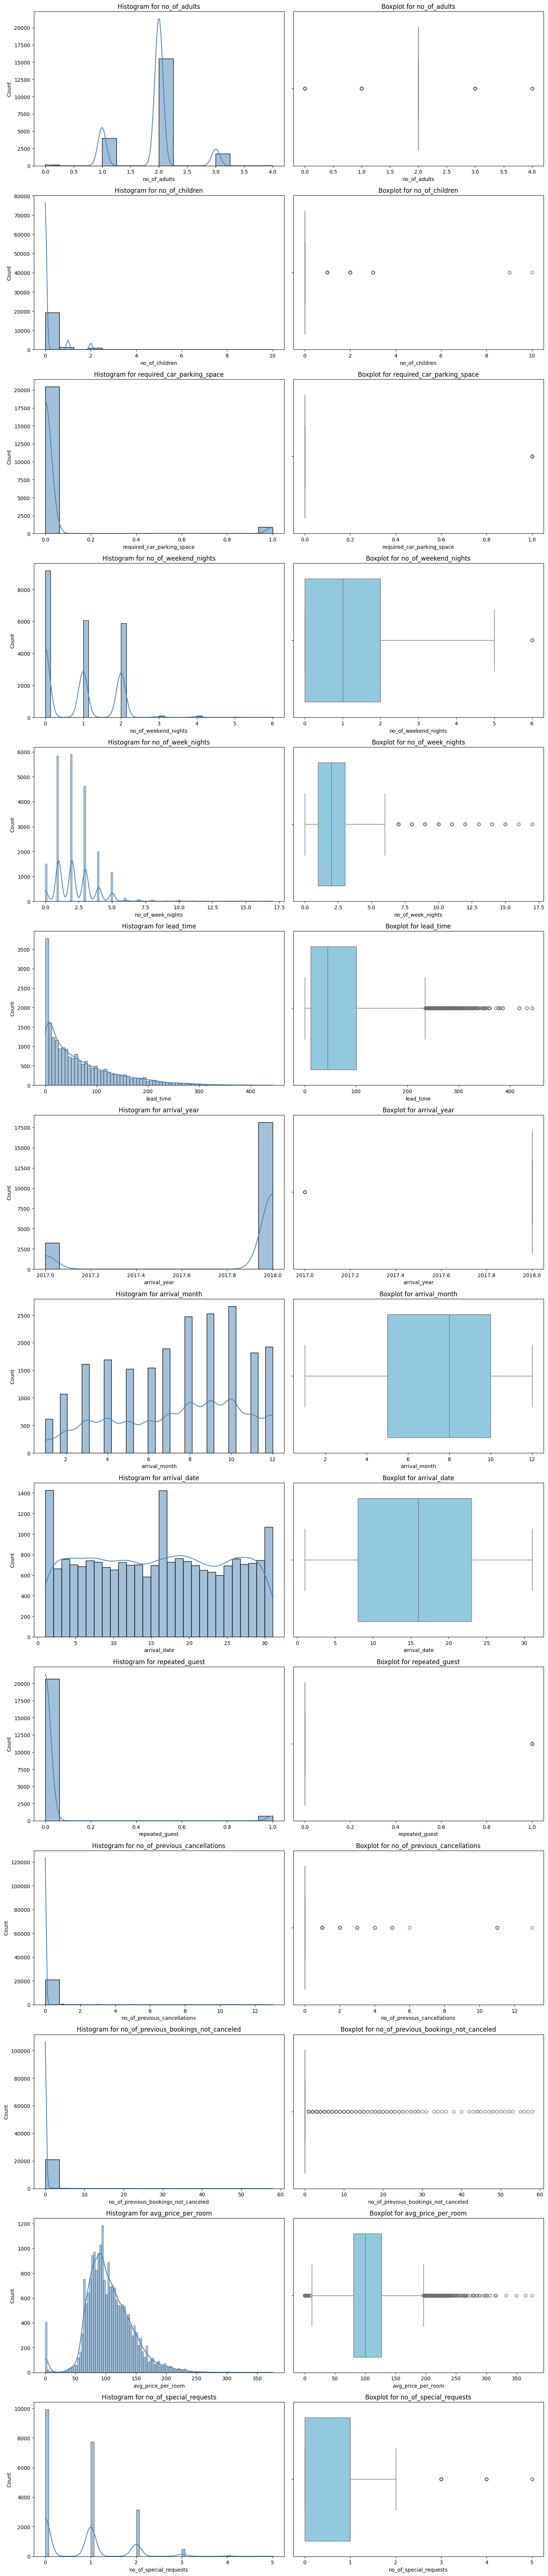

In [21]:
num_plot_dist(data, num_cols)

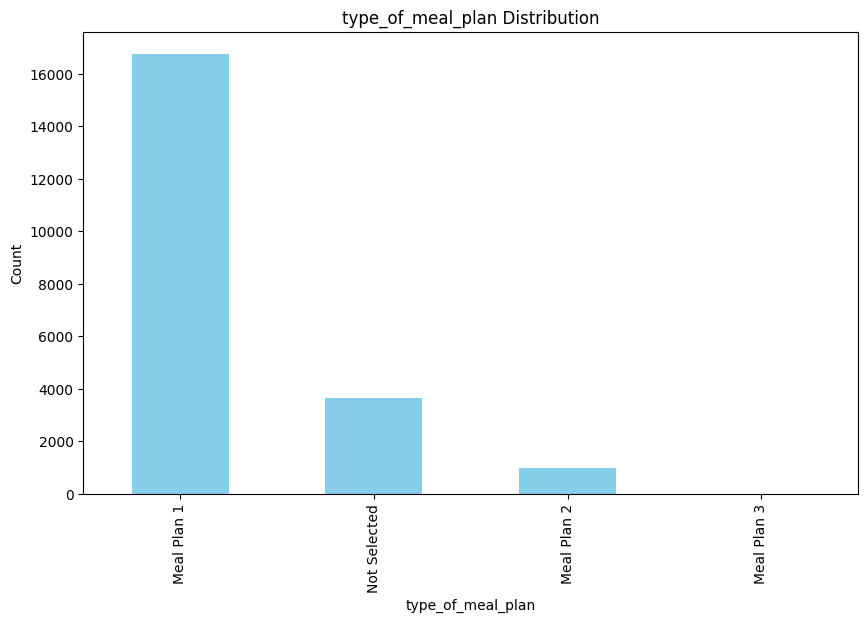

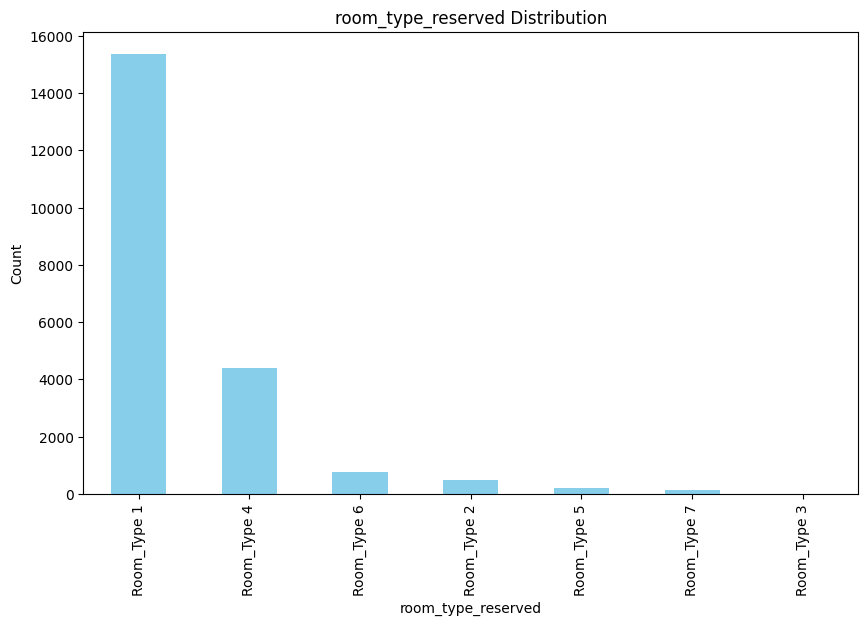

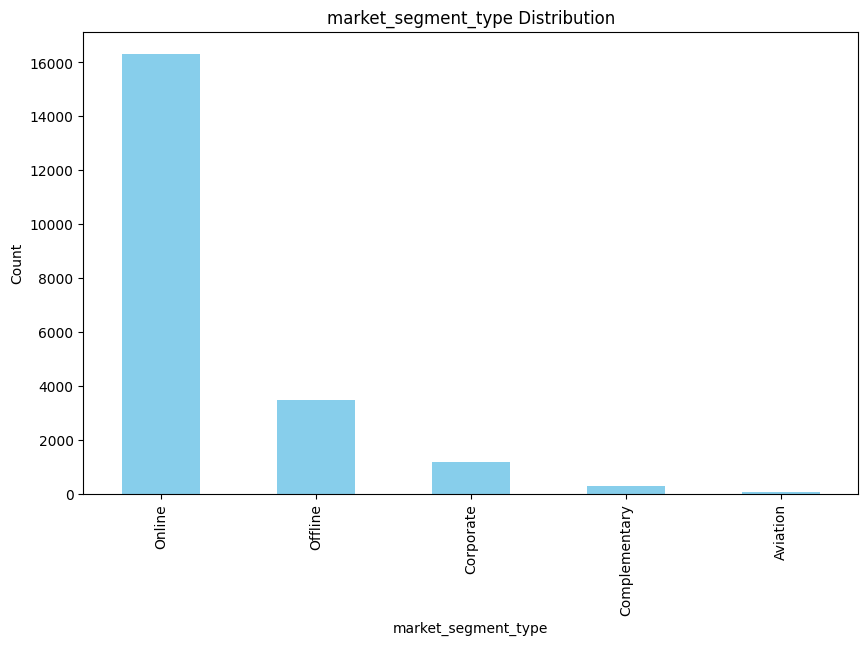

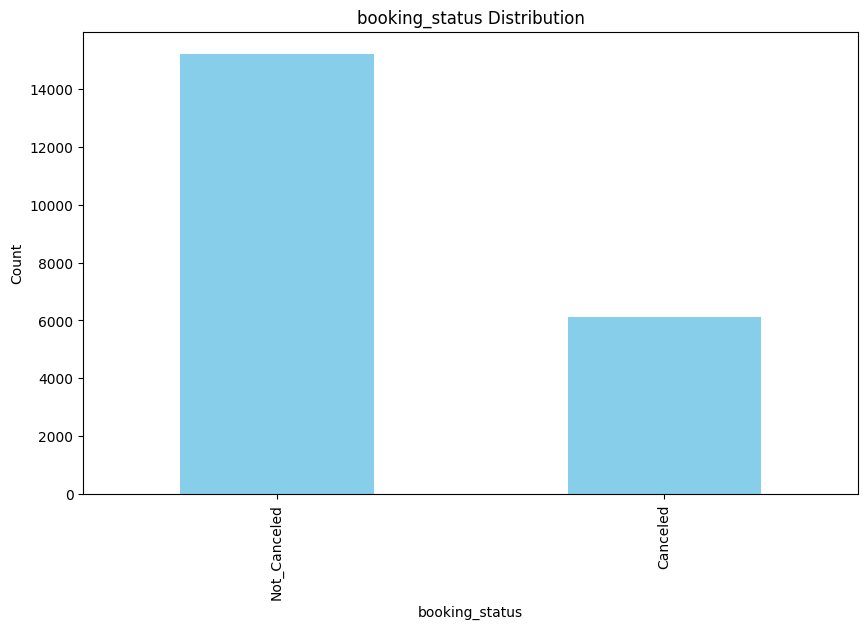

In [22]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data [cat_feature].value_counts().plot(kind="bar", color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

Bivariate Analysis

In [23]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
        
    plt.tight_layout()
    plt.show()

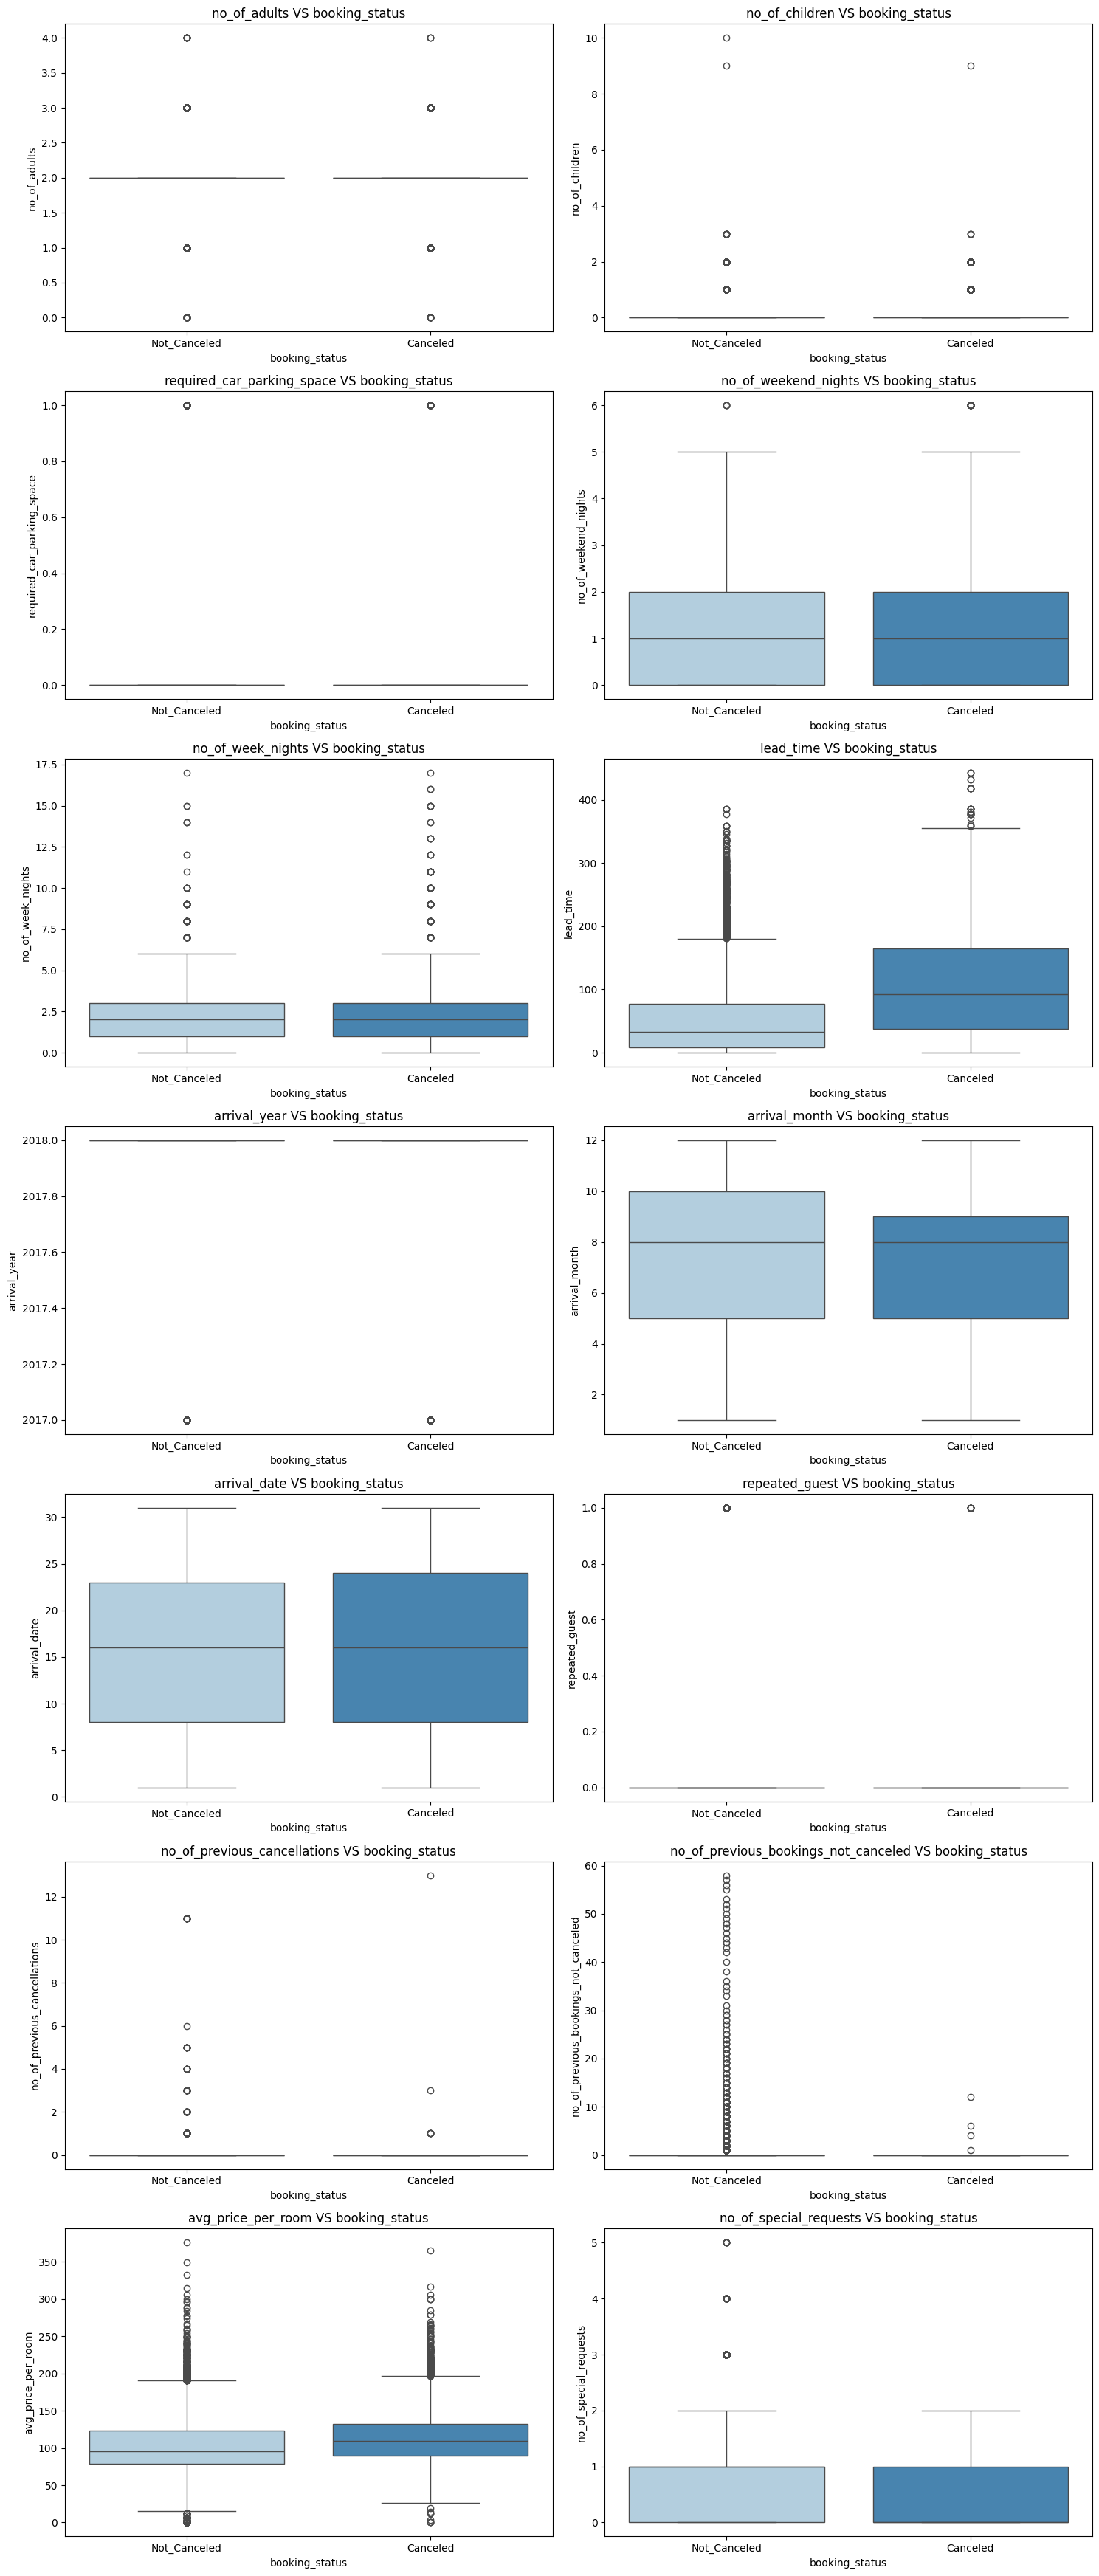

In [24]:
plot_bivariate_num(data, "booking_status", num_cols)

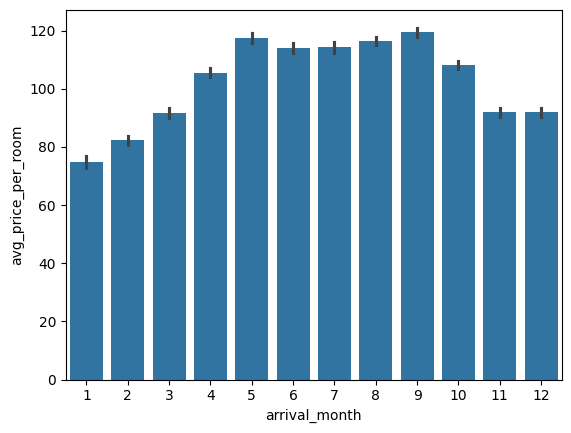

In [25]:
sns.barplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()

Bivariate Analysis for Categorical Features

In [26]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis = 'x', rotation =90)
        
    plt.tight_layout()
    plt.show()
    

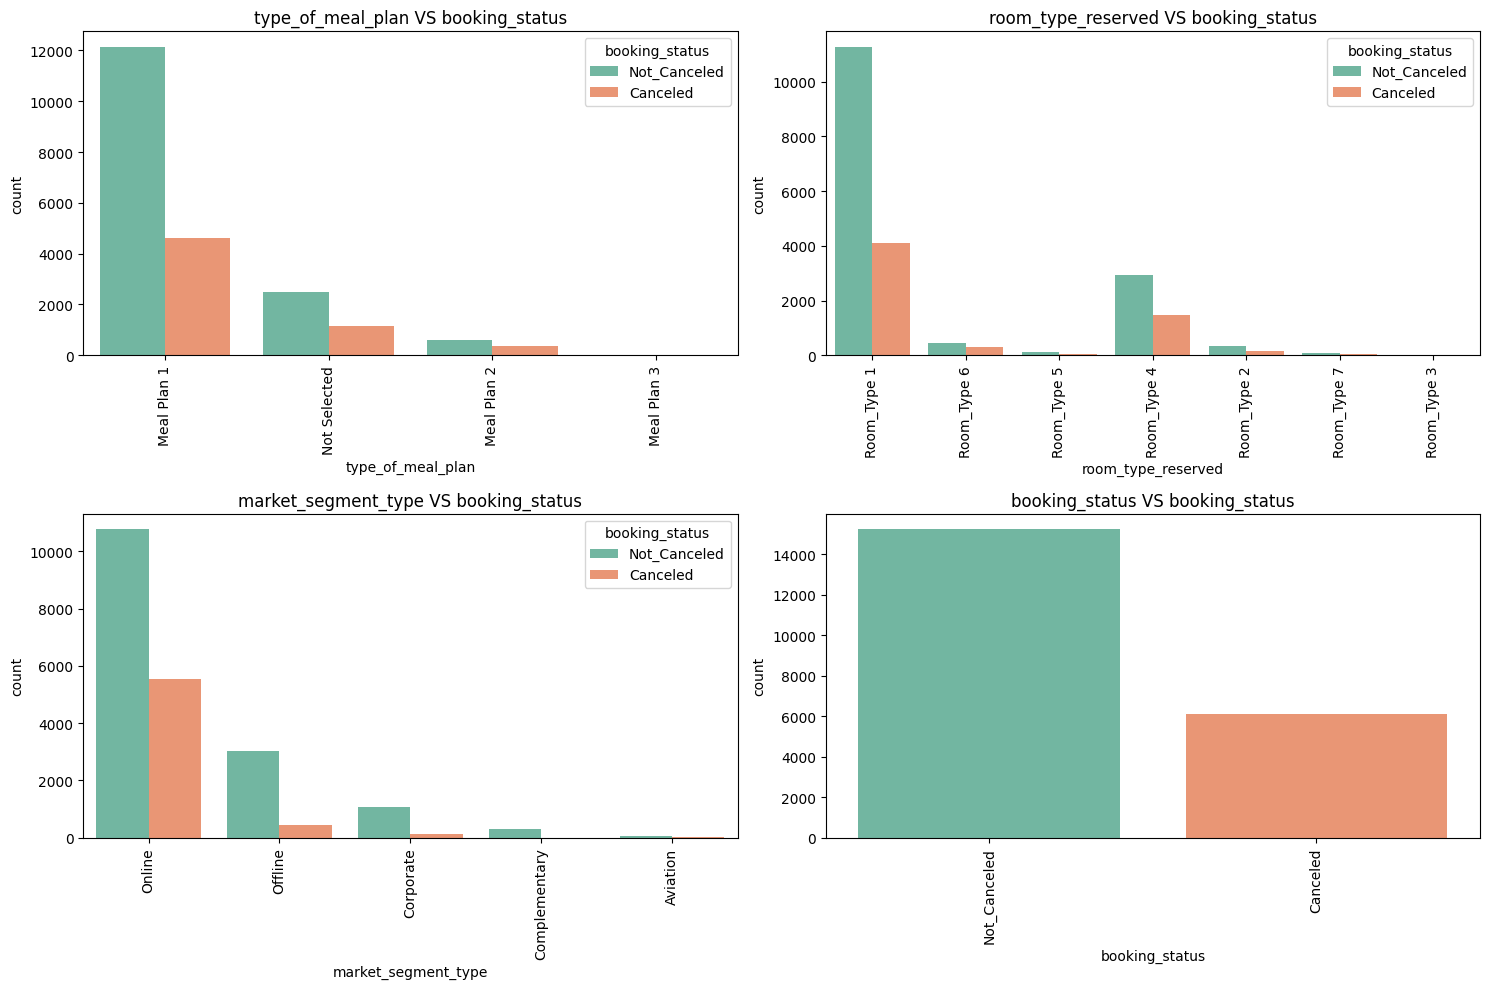

In [27]:
plot_bivariate_cat(data,"booking_status", cat_cols)

## Data Processing
- Label encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [30]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

Multicollinearity Check

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [34]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif_data

,Features,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


Correlation Check(Heatmap)

In [36]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

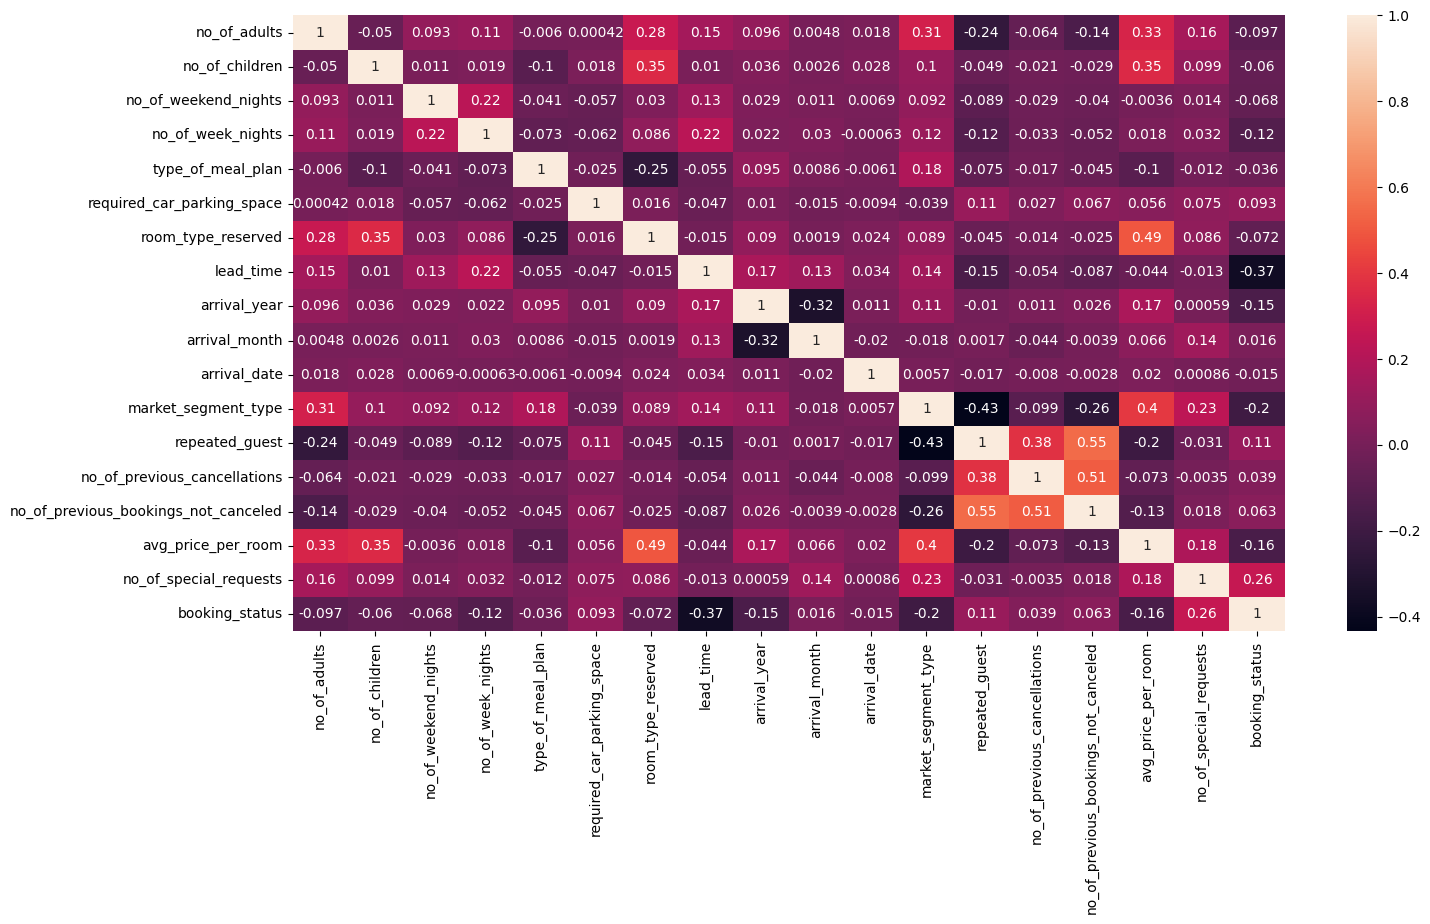

In [37]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True)

Skewness Check

In [38]:
import numpy as np

skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [39]:
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])

In [40]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

Handling Imbalanced Dataset

In [41]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [42]:
X = df.drop(columns='booking_status')
y = df['booking_status']


In [43]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0


In [44]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: booking_status, dtype: int32

In [2]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X, y)

In [47]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [48]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [49]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [50]:
balanced_df.shape

(30462, 18)

In [51]:
df = balanced_df.copy()

In [52]:
df.shape

(30462, 18)

Feature Selection & Importance

In [53]:
len(df.columns)

18

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [56]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [57]:
feature_import = model.feature_importances_

In [58]:
feature_import_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_import
})

In [59]:
feature_import_df

,Feature,Importance
0,no_of_adults,0.018242
1,no_of_children,0.006775
2,no_of_weekend_nights,0.030316
3,no_of_week_nights,0.044419
4,type_of_meal_plan,0.020648
5,required_car_parking_space,0.011845
6,room_type_reserved,0.020059
7,lead_time,0.260226
8,arrival_year,0.016362
9,arrival_month,0.085296


In [60]:
top_features_df = feature_import_df.sort_values(by='Importance', ascending=False)

In [61]:
top_features_df

,Feature,Importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [62]:
len(df.columns)

18

In [63]:
top_ten_features = top_features_df['Feature'].head(10).values

In [66]:
top_ten_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [67]:
top_ten_features_df = df[top_ten_features.tolist()+['booking_status']]

In [68]:
top_ten_features_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [69]:
len(top_ten_features_df.columns)

11

In [71]:
df = top_ten_features_df.copy()

In [72]:
df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


## Model Selection

In [89]:
# !pip install xgboost lightgbm

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [92]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive_ Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier()
}

In [95]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision':[],
    'Recall':[],
    'F1 Score': []
}

In [96]:
for model_name , classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    
    metrics_df = pd.DataFrame(metrics)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [97]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,Logistic Regression,0.774331,0.802787,0.731922,0.765718
2,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
4,KNN,0.779419,0.856612,0.675244,0.755191
5,Decision Tree,0.840801,0.850000,0.830619,0.840198
6,Naive_ Bayes,0.773346,0.803232,0.728664,0.764133
7,XGBoost,0.870343,0.866324,0.878176,0.872210
8,LGBM,0.866732,0.851494,0.890879,0.870742


Training the model with Random Forest Classifier

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [99]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
rf_model = RandomForestClassifier(random_state=42)

In [102]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split':randint(2, 10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [False, True]
}
   

In [103]:
random_search = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions= params_dist,
    n_iter= 5,
    cv = 5,
    verbose= 2,
    random_state= 42,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=False, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.0s
[CV] END bootstrap=False, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.0s
[CV] END bootstrap=False, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.6s
[CV] END bootstrap=False, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.3s
[CV] END bootstrap=False, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.8s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  26.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  25.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  20

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027408AD7160>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027408AD6EF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000274103673D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002740A0686A0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [104]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 314}

In [105]:
best_rf_model = random_search.best_estimator_

In [106]:
best_rf_model

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=314, random_state=42)

In [107]:
y_pred = best_rf_model.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [111]:
print(f"Accuracy Score: {accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Accuracy Score: 0.8920072214016084
Precision Score: 0.8892834086507424
Recall Score: 0.8973941368078175
F1 Score: 0.8933203631647212


In [112]:
import joblib

In [113]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [114]:
loaded_model = joblib.load("random_forest.pkl")

In [115]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [117]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [118]:
prediction = loaded_model.predict(new_data)

In [119]:
prediction

array([1])